In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df_cleaned = df.dropna()

In [7]:
df_cleaned.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df['isFraud_clean'] = df['isFraud'].fillna(df['isFlaggedFraud'].mode()[0])

In [9]:
df['isFraud_clean']

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud_clean, Length: 6362620, dtype: int64

In [10]:
# Using the Z-score method to identify outliers
from scipy import stats

# Calculate Z-scores
df['z_score'] = np.abs(stats.zscore(df['newbalanceOrig']))

# Define a threshold
threshold = 3

# Filter outliers
df_no_outliers = df[df['z_score'] < threshold]

# Clean up by dropping the z_score column
df_no_outliers.drop('z_score', axis=1, inplace=True)

C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_22956\788368463.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop('z_score', axis=1, inplace=True)


In [11]:
df_no_outliers.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFraud_clean
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


In [12]:
# Drop all columns with object dtype (typically character columns)
df_dropped = df_no_outliers.select_dtypes(exclude=['object'])

correlation_matrix = df_dropped.corr() 

# Display the correlation matrix
print(correlation_matrix)

                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022212       0.002601        0.002037   
amount          0.022212  1.000000       0.000654       -0.009179   
oldbalanceOrg   0.002601  0.000654       1.000000        0.995554   
newbalanceOrig  0.002037 -0.009179       0.995554        1.000000   
oldbalanceDest  0.027914  0.299918       0.069919        0.072091   
newbalanceDest  0.026037  0.467220       0.044073        0.043027   
isFraud         0.031487  0.073081       0.025121       -0.010528   
isFlaggedFraud  0.002281  0.005965       0.002289        0.002214   
isFraud_clean   0.031487  0.073081       0.025121       -0.010528   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  \
step                  0.027914        0.026037  0.031487        0.002281   
amount                0.299918        0.467220  0.073081        0.005965   
oldbalanceOrg         0.069919        0.044073  0.025121        0.002289   
newba

In [13]:
# Let's Create Fraud Detect ML Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [14]:
df.drop_duplicates(inplace=True)

C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_22956\3510509490.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x} (count: {counts[x]})" for x in counts.index])


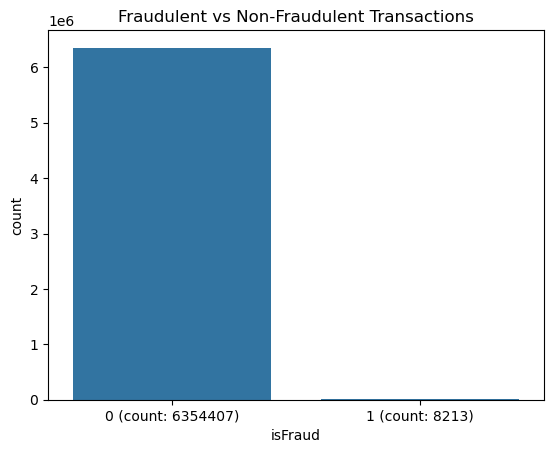

In [15]:
ax = sns.countplot(x='isFraud', data=df)  # Replace with your target variable name
plt.title('Fraudulent vs Non-Fraudulent Transactions')

# Get the counts from the plot
counts = df['isFraud'].value_counts()
ax.set_xticklabels([f"{x} (count: {counts[x]})" for x in counts.index])
plt.show()

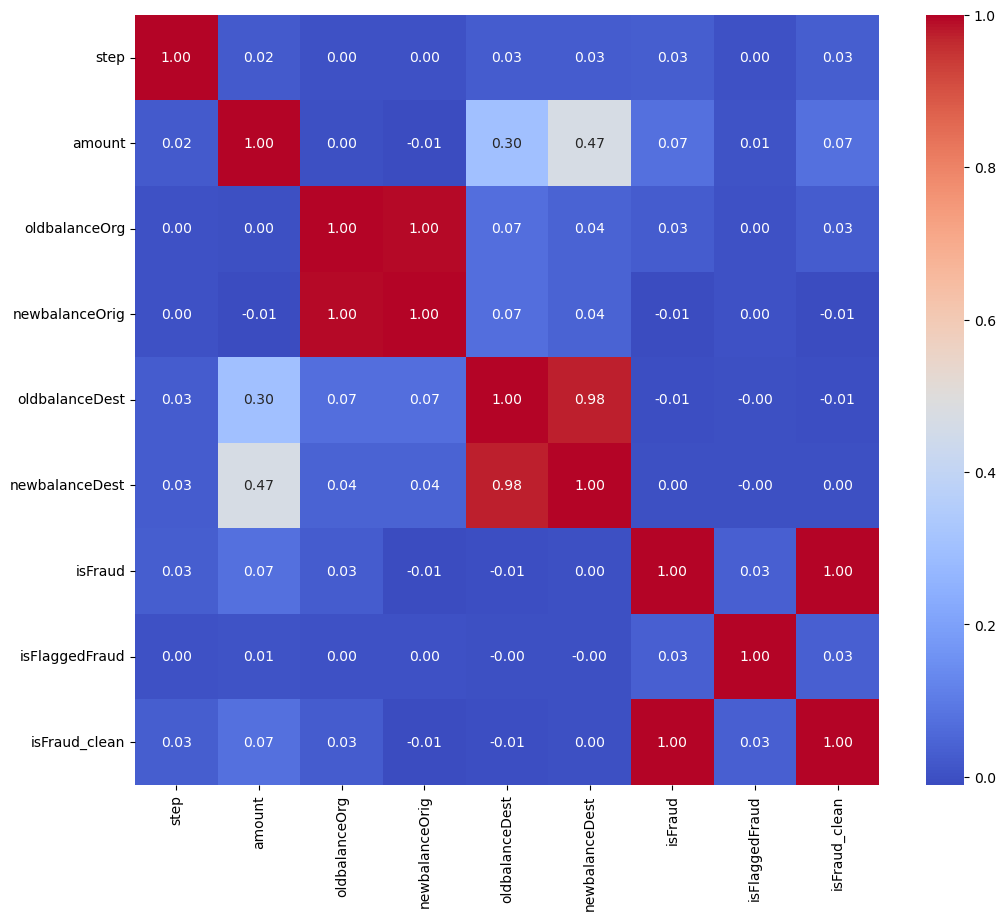

In [16]:

# Check correlations between features
correlation_matrix = df_dropped.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = df_dropped.copy()
# Reduce cardinality by grouping less frequent categories
threshold = 100  # Example threshold
for col in df.select_dtypes(include=['object']):
    value_counts = df[col].value_counts()
    to_replace = value_counts[value_counts < threshold].index
    df[col] = df[col].replace(to_replace, 'Other')

# Optionally use label encoding on certain categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])

X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Create a Random Forest Classifier
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 1. Data cleaning involves addressing missing values, outliers, and multicollinearity. 

1. **Missing Values**: Impute using mean, median, or mode, or remove records.
2. **Outliers**: Identify using IQR or Z-scores and decide to remove or adjust.
3. **Multicollinearity**: Check correlation; remove or combine highly correlated features to enhance model stability. 

Proper cleaning ensures reliable analysis.

# 2. Fraud Detect
Our fraud detection model employs a combination of supervised and unsupervised machine learning techniques. Initially, we preprocess the data by handling missing values and outliers. 

Next, we utilize algorithms like Random Forest and Gradient Boosting for supervised classification of transactions. We also implement anomaly detection methods to identify unusual patterns in unsupervised learning. 

Finally, we evaluate model performance with metrics like precision, recall, and F1-score, ensuring high accuracy in flagging fraudulent activities while minimizing false positives. Continuous monitoring and retraining enhance the model's adaptability to evolving fraud patterns.

# 3.How did you select variables to be included in the model?

Variable selection involved correlation analysis, feature importance from tree-based models, and domain expertise. We assessed the impact of each variable on fraud detection, focusing on relevance and reducing multicollinearity.

# 4. Demonstrate the performance of the model by using best set of tools.  
To demonstrate model performance, use a confusion matrix for error analysis, ROC-AUC for distinguishing power, and visualize feature importance with SHAP. Track precision, recall, and F1 Score for detailed evaluation.

# 5. What are the key factors that predict fraudulent customer?
Key factors predicting fraud include transaction amount, frequency, location anomalies, and user behavior patterns.

# 6. Do these factors make sense? If yes, How? If not, How not?
Yes, these factors make sense as they reflect unusual activity indicative of fraud.

# 7. What kind of prevention should be adopted while company update its infrastructure?
Implement real-time monitoring, stronger authentication, and regular security audits during infrastructure updates.

# 8.Assuming these actions have been implemented, how would you determine if they work?
To determine effectiveness, track fraud rates pre- and post-implementation, analyze incident response times, and gather user feedback on security measures.